In [1]:
###Level 3

In [2]:
##Task 1

In [12]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import string
import nltk

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

data=pd.read_csv("Datasets/Dataset.csv")
sia = SentimentIntensityAnalyzer()
pre = lambda t: [w for w in word_tokenize(t.lower().translate(str.maketrans("", "", string.punctuation))) if w not in stopwords.words('english')]

pos, neg = [], []

for t in data['Rating text'].astype(str):
    tokens = pre(t)
    score = sia.polarity_scores(t)['compound']
    (pos if score >= 0.05 else neg).extend(tokens)

pos_wc, neg_wc = pd.Series(pos).value_counts(), pd.Series(neg).value_counts()

print("Most common positive keywords:")
print(pos_wc.head(10))

print("\nMost common negative keywords:")
print(neg_wc.head(10))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Partha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Partha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Partha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common positive keywords:
good         3179
excellent     301
Name: count, dtype: int64

Most common negative keywords:
average    3737
rated      2148
poor        186
Name: count, dtype: int64


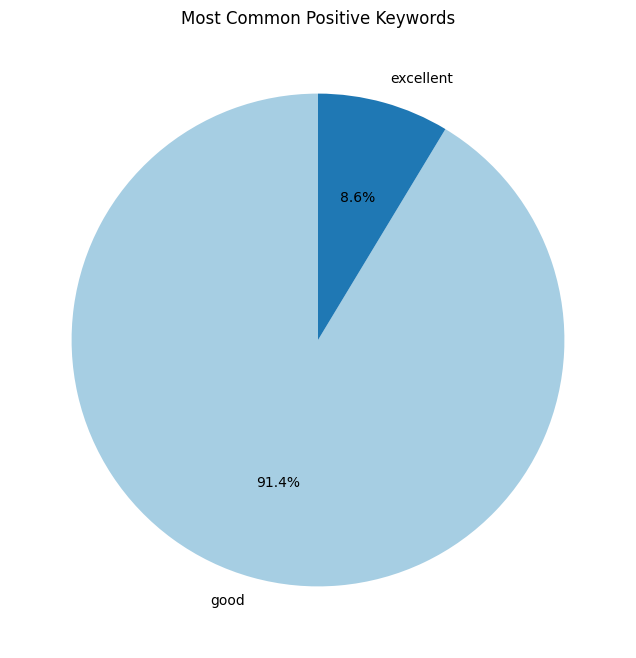

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(pos_wc.head(10), labels=pos_wc.head(10).index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Most Common Positive Keywords')
plt.show()

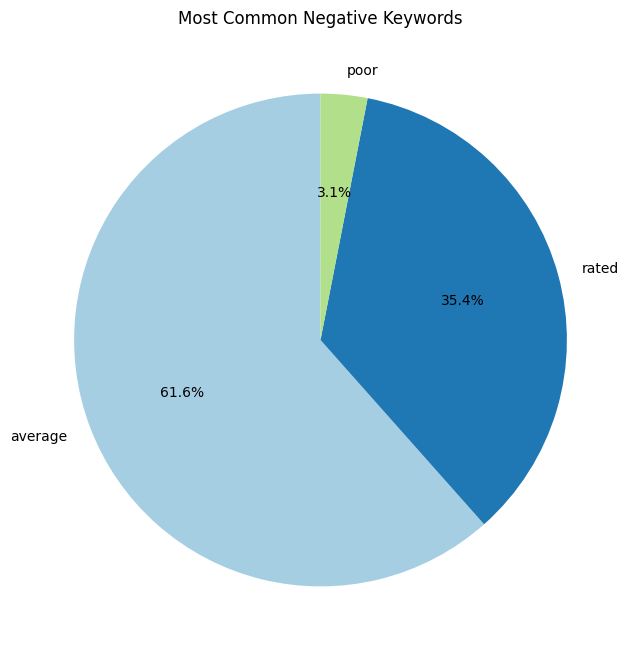

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(neg_wc.head(10), labels=neg_wc.head(10).index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Most Common Negative Keywords')
plt.show()

In [19]:
data['Review Length'] = data['Rating text'].apply(lambda text: len(nltk.word_tokenize(str(text))))
avg_length = data['Review Length'].mean()
print(f"Average Review Length: {avg_length:.2f} words")
print("\nRelationship between Review Length and Rating:")
print(data.groupby('Aggregate rating')['Review Length'].mean())

Average Review Length: 1.34 words

Relationship between Review Length and Rating:
Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: Review Length, dtype: float64


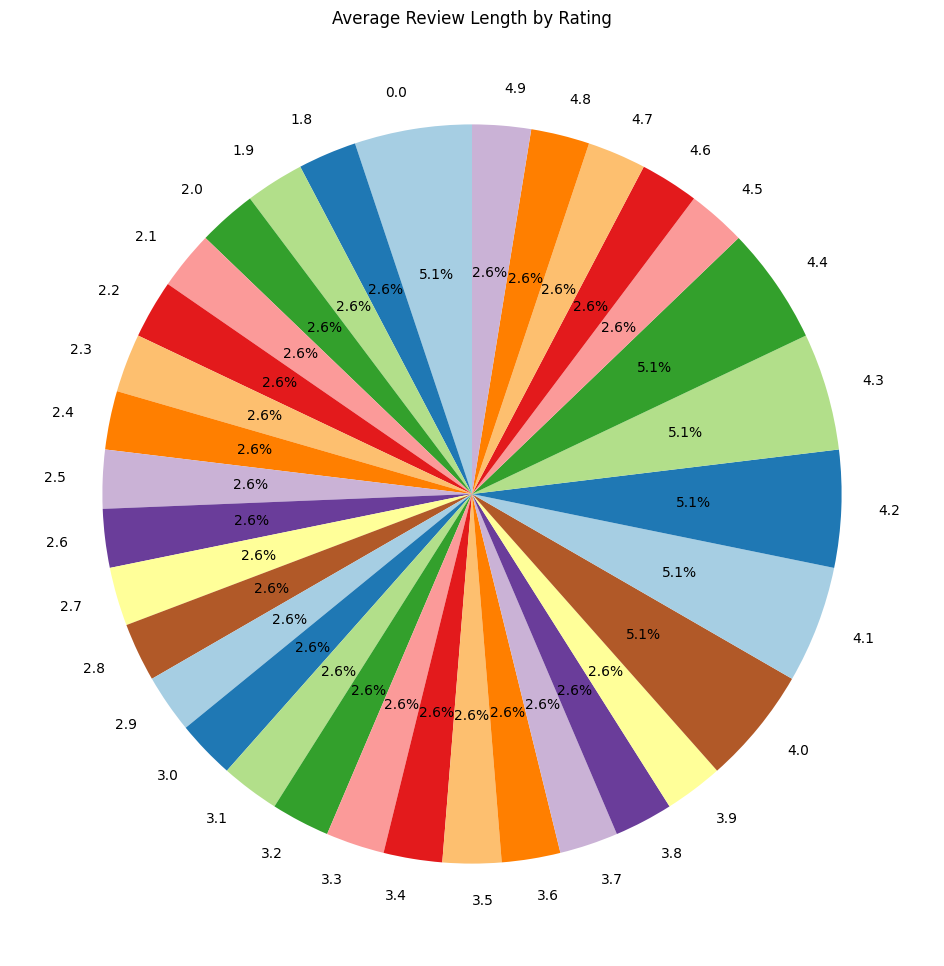

In [21]:
rating_vs_length = data.groupby('Aggregate rating')['Review Length'].mean()

# Plotting a pie chart
plt.figure(figsize=(12, 12))
plt.pie(rating_vs_length, labels=rating_vs_length.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Average Review Length by Rating')
plt.show()